# Problem Statement:

Analyze and Provide Insights on Amazon Sales Report

# Key Objectives:

1. Sales Overview: Understand the overall sales performance, trends, and paferns over time.
2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular
products.
3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.
4. Customer Segmentation: Segment customers based on their buying behaviour, location, and other relevant
factors.
5. Geographical Analysis: Explore the geographical distribuƟon of sales, focusing on states and cities.
6. Business Insights: Provide actionable insights and recommendaƟons based on the analysis to optimize sales
strategies, improve customer satisfaction, and enhance overall business performance.

# Deliverables:

1. Comprehensive analysis report summarizing key findings, insights, and recommendations.
2. Visualizations (charts, graphs) illustrating various aspects of the data analysis.
3. Insights on product preferences, customer behaviour, and geographical sales distribution.
4. Recommendations for improving sales strategies, inventory management, and customer service.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

# Loading Data Set

In [2]:
df = pd.read_csv('/Users/patelzeel/Downloads/Amazon Sale Report.csv')

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
df.shape

(128976, 21)

In [5]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Qty'] = df['Qty']

In [8]:
df = df[['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category', 'Size', 'Courier Status' , 'Qty', 'Amount', 'ship-city', 'ship-state', 'B2B']]

In [9]:
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,TELANGANA,False
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,HARYANA,False
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,TELANGANA,False
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,False


In [10]:
df.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
Amount                7800
ship-city               35
ship-state              35
B2B                      0
dtype: int64

In [11]:
(7800/len(df))*100

6.047636769631559

In [12]:
df.dropna(inplace= True)

In [13]:
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,TELANGANA,False
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,HARYANA,False
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,TELANGANA,False
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,False


In [14]:
df[df.duplicated()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B
167,407-3742007-3242711,2022-04-30,Shipped,Amazon,Expedited,Shirt,S,Shipped,1,517.0,HYDERABAD,TELANGANA,False
201,408-5748499-6859555,2022-04-30,Shipped,Amazon,Expedited,T-shirt,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False
202,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,S,Shipped,1,399.0,HYDERABAD,TELANGANA,False
204,402-4393761-0311520,2022-04-30,Shipped,Amazon,Expedited,Shirt,XXL,Shipped,1,363.0,Chennai,TAMIL NADU,False
205,407-5633625-6970741,2022-04-30,Shipped,Amazon,Expedited,Shirt,S,Shipped,1,685.0,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127609,404-0476106-9221156,2022-06-01,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,S,Shipped,1,355.0,KURNOOL,ANDHRA PRADESH,False
128065,171-7173124-7979515,2022-06-01,Shipped - Delivered to Buyer,Merchant,Standard,Blazzer,L,Shipped,1,735.0,PUNE,MAHARASHTRA,False
128373,407-3748395-2933152,2022-06-01,Shipped,Amazon,Expedited,Shirt,3XL,Shipped,1,399.0,BENGALURU,KARNATAKA,False
128496,406-7346635-7865146,2022-06-01,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,292.0,BENGALURU,KARNATAKA,False


In [15]:
df.drop_duplicates(inplace= True)

In [16]:
df.shape

(120424, 13)

In [17]:
categorical_columns = [
    'Status', 
    'Fulfilment', 
    'ship-service-level', 
    'Category', 
    'Size', 
    'Courier Status', 
    'ship-city', 
    'ship-state', 
    'B2B'
]
value_counts = {col: df[col].value_counts(normalize= True) for col in categorical_columns}

for col, value_counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")


 

Value counts for column 'Status':
Status
Shipped                          0.640993
Shipped - Delivered to Buyer     0.236664
Cancelled                        0.088836
Shipped - Returned to Seller     0.016101
Shipped - Picked Up              0.008055
Pending                          0.005431
Pending - Waiting for Pick Up    0.002300
Shipped - Returning to Seller    0.001196
Shipped - Out for Delivery       0.000291
Shipped - Rejected by Buyer      0.000091
Shipped - Lost in Transit        0.000033
Shipped - Damaged                0.000008
Name: proportion, dtype: float64


Value counts for column 'Fulfilment':
Fulfilment
Amazon      0.690892
Merchant    0.309108
Name: proportion, dtype: float64


Value counts for column 'ship-service-level':
ship-service-level
Expedited    0.683294
Standard     0.316706
Name: proportion, dtype: float64


Value counts for column 'Category':
Category
T-shirt     0.389200
Shirt       0.384500
Blazzer     0.121288
Trousers    0.084095
Perfume     0.009043


In [18]:
df.describe()

,Date,Qty,Amount
count,120424,120424.000000,120424.000000
mean,2022-05-12 12:48:40.799840512,0.961262,649.056682
min,2022-03-31 00:00:00,0.000000,0.000000
25%,2022-04-20 00:00:00,1.000000,449.000000
50%,2022-05-10 00:00:00,1.000000,606.000000
75%,2022-06-04 00:00:00,1.000000,788.000000
max,2022-06-29 00:00:00,8.000000,5584.000000
std,NaN,0.214337,281.425895


In [19]:
df.describe(include= 'object')

,Order ID,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,ship-city,ship-state
count,120424,120424,120424,120424,120424,120424,120424,120424,120424
unique,112861,12,2,2,9,11,3,8697,68
top,171-5057375-2831560,Shipped,Amazon,Expedited,T-shirt,M,Shipped,BENGALURU,MAHARASHTRA
freq,12,77191,83200,82285,46869,20855,108805,10600,20957


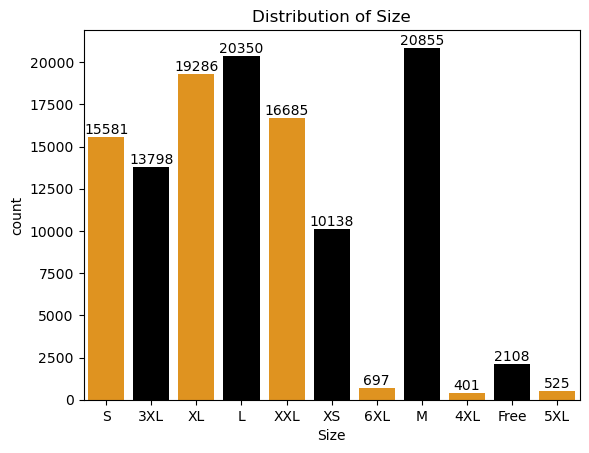

In [20]:
plt.title('Distribution of Size')
ax = sns.countplot(x = 'Size' , data = df, palette=['#FF9900', 'black'])
for bars in ax.containers:
    ax.bar_label(bars)


Note: From the analysis above, it is evident that Size M is the most frequently sold size within the given category.

In [21]:
df.groupby(['Size'], as_index= False)['Qty'].sum().sort_values(by = 'Qty' , ascending = False)


,Size,Qty
6,M,20006
5,L,19544
8,XL,18484
10,XXL,16125
7,S,14960
0,3XL,13258
9,XS,9774
4,Free,2027
3,6XL,679
2,5XL,511


Text(0.5, 1.0, 'Total Quantity Ordered for Each Size')

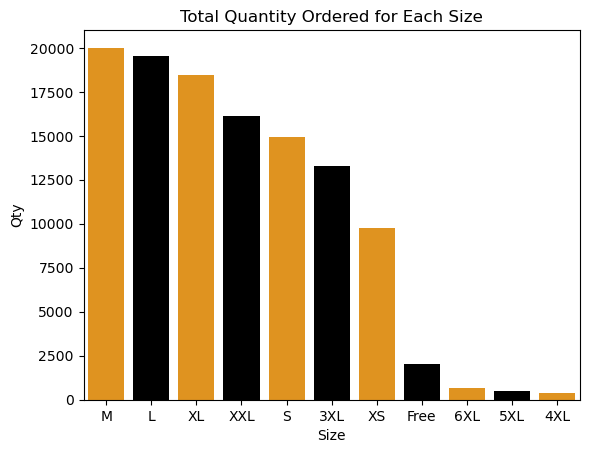

In [22]:
Qty_size = df.groupby(['Size'], as_index= False)['Qty'].sum().sort_values(by = 'Qty' , ascending = False)
sns.barplot(x = 'Size' , y = 'Qty', data = Qty_size, palette=['#FF9900', 'black'])
plt.title('Total Quantity Ordered for Each Size')

Note: The bar plot visualizes the total quantity ordered (Qty) for each size category. Sizes are sorted by descending order of total quantity, providing insights into sales volume per size.



# Courier Status

Text(0.5, 1.0, 'Courier Status')

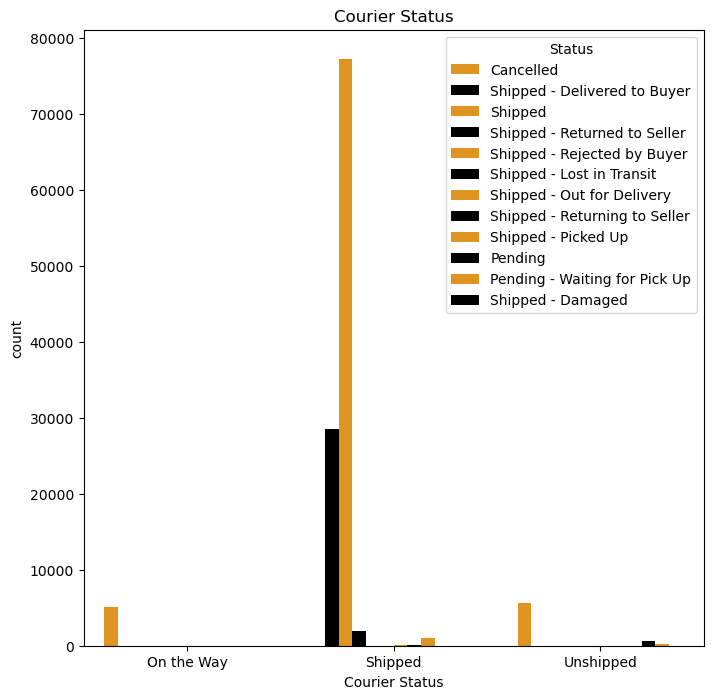

In [23]:
plt.figure(figsize= (8 , 8))
sns.countplot(x = "Courier Status", data = df , hue= 'Status', palette=['#FF9900', 'black'])
plt.title('Courier Status')

Note: The majority of orders are successfully shipped to their destinations.

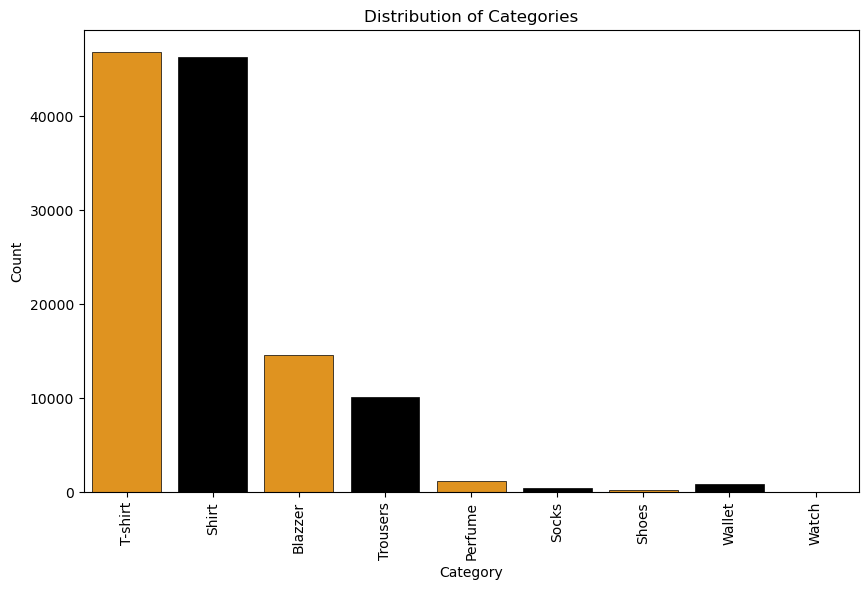

In [24]:
df['Category'] = df['Category'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette=['#FF9900', 'black'], edgecolor='black', linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

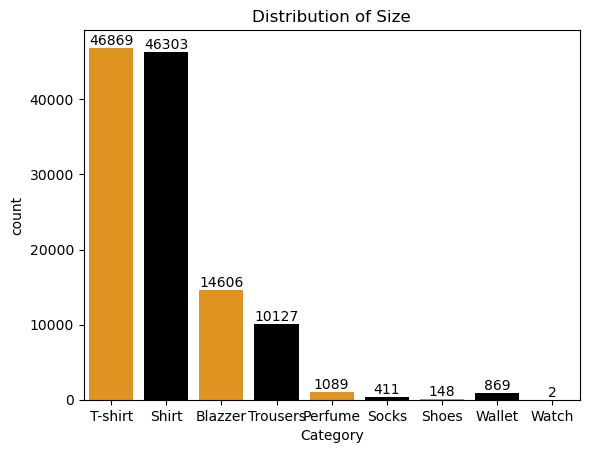

In [25]:
plt.title('Distribution of Size')
ax = sns.countplot(x = 'Category' , data = df, palette=['#FF9900', 'black'])
for bars in ax.containers:
    ax.bar_label(bars)

Note: The majority of buyers purchase t-shirts.

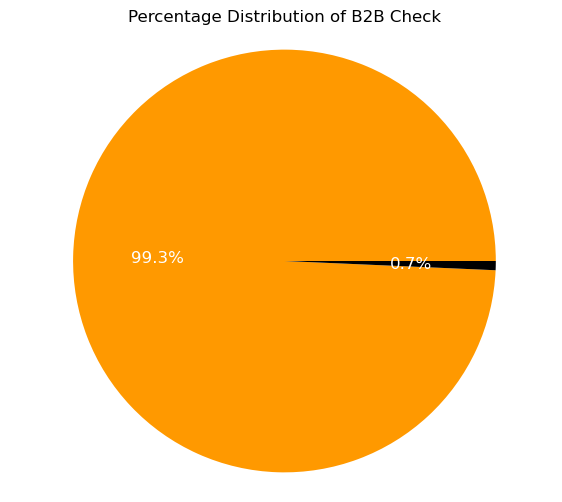

In [26]:
B2B_check = df['B2B'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(B2B_check, labels=B2B_check.index, autopct='%1.1f%%', colors = ['#FF9900', 'black'], textprops={'color': 'white', 'fontsize': 12})
plt.title('Percentage Distribution of B2B Check')
plt.axis('equal')
plt.show()

Note: The analysis reveals that the majority of buyers, constituting 99.3%, are retailers, whereas only 0.7% are categorized as B2B (Business-to-Business).



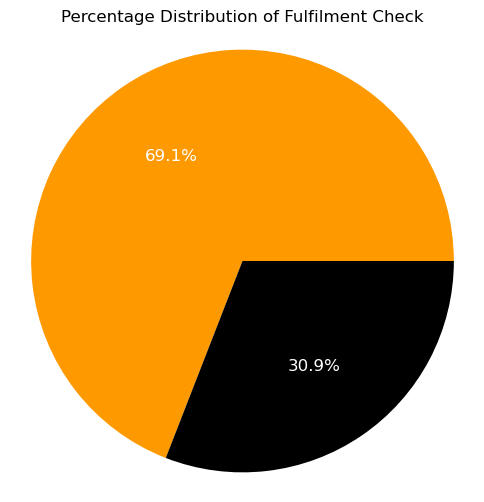

In [27]:
Fulfilment_check = df['Fulfilment'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(Fulfilment_check, labels=Fulfilment_check.index, autopct='%1.1f%%', colors = ['#FF9900', 'black'], textprops={'color': 'white', 'fontsize': 12})
plt.title('Percentage Distribution of Fulfilment Check')
plt.axis('equal')
plt.show()

Note: The data shows that Amazon constitutes 69.1% of the total buyers, while merchants account for the remaining 30.9%.

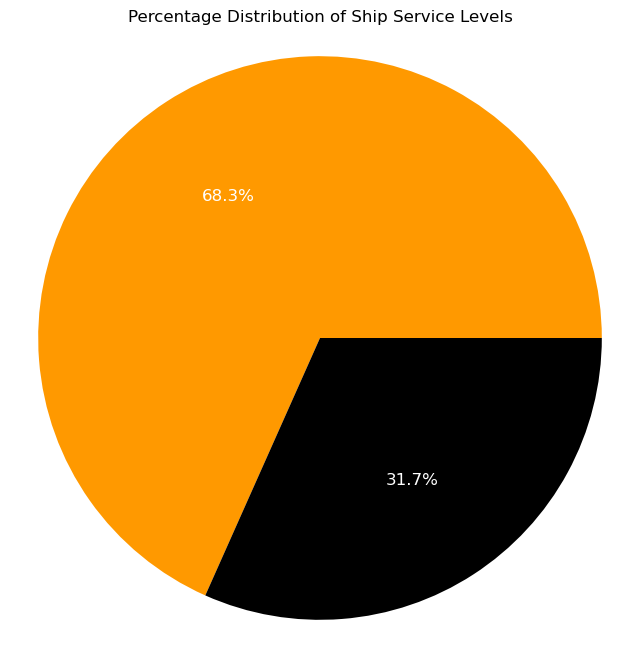

In [28]:
ship_service_level_check = df['ship-service-level'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(ship_service_level_check, labels=ship_service_level_check.index, autopct='%1.1f%%',colors = ['#FF9900', 'black'], textprops={'color': 'white', 'fontsize': 12})
plt.title('Percentage Distribution of Ship Service Levels')
plt.axis('equal')  
plt.show()


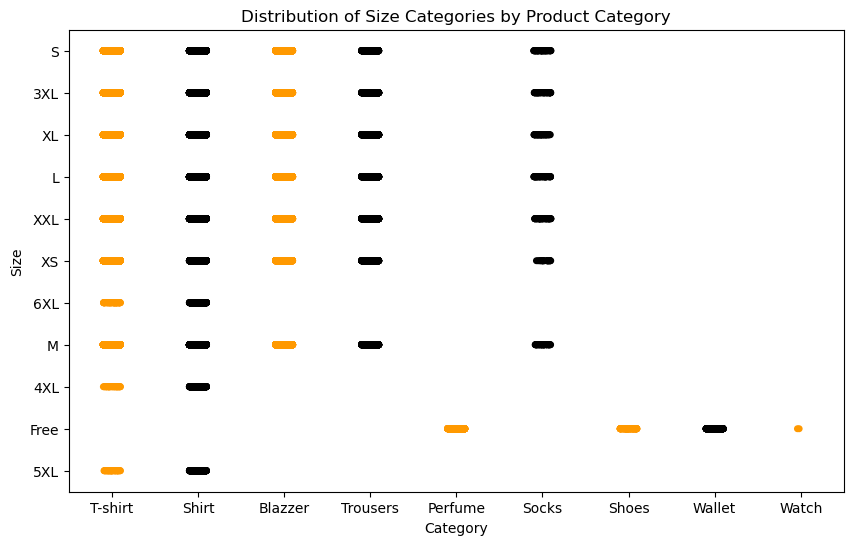

In [29]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category', y='Size', data=df, palette=['#FF9900', 'black'])
plt.title("Distribution of Size Categories by Product Category")
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

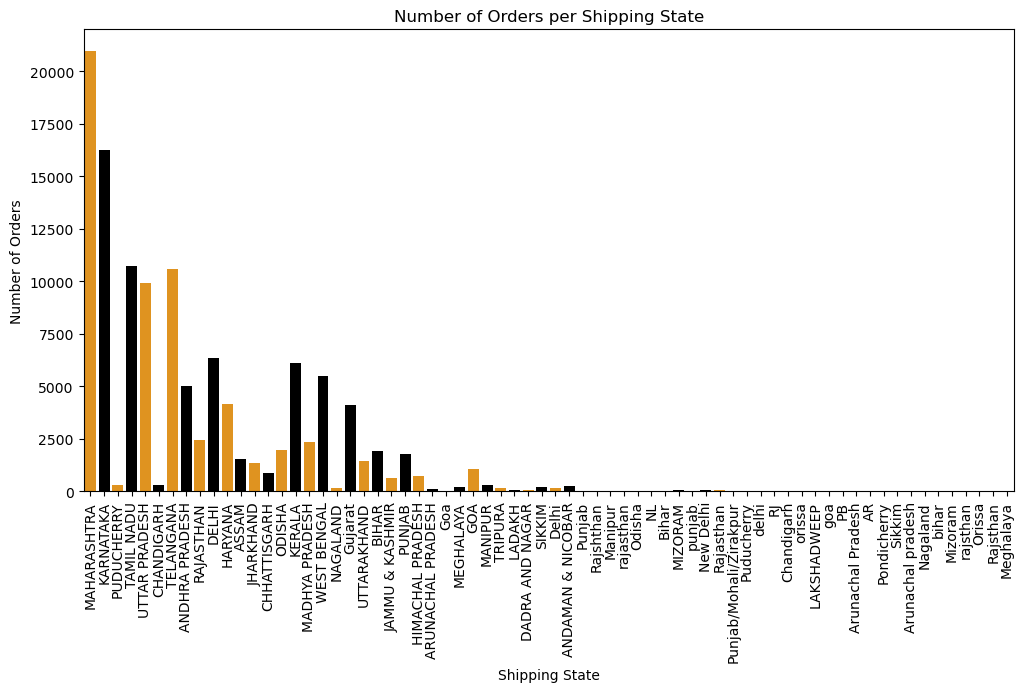

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ship-state', data=df, palette=['#FF9900', 'black'])
plt.title('Number of Orders per Shipping State')
plt.xlabel('Shipping State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90) 
plt.show()

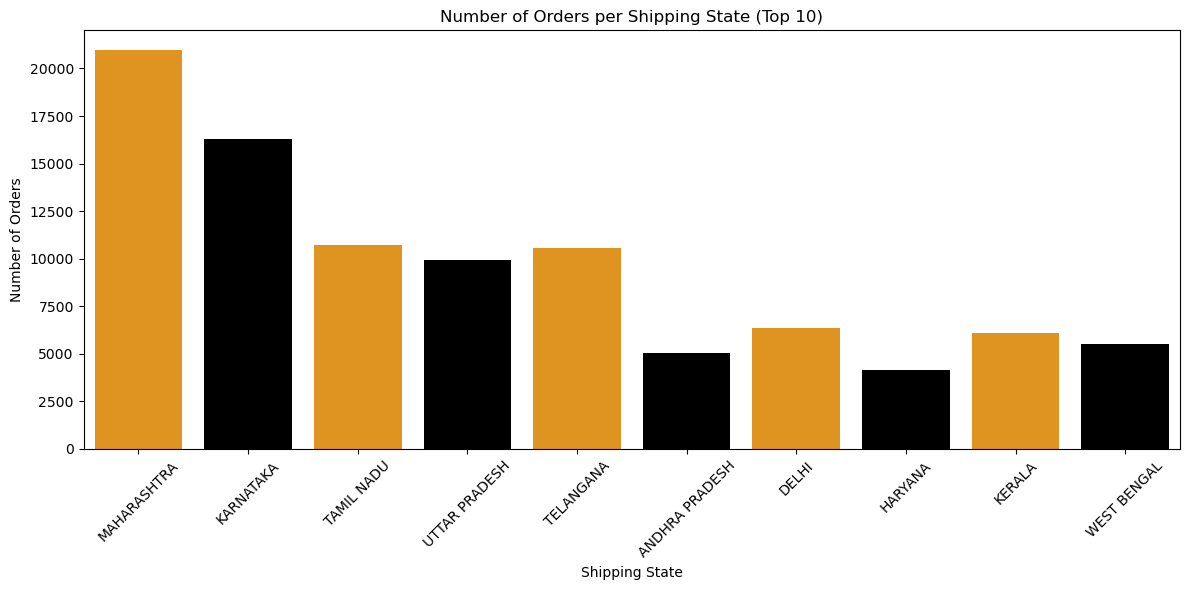

In [31]:
Top_10_State = df['ship-state'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 states
df_top_10 = df[df['ship-state'].isin(Top_10_State)]
plt.figure(figsize=(12, 6))
sns.countplot(x='ship-state', data=df_top_10, palette=['#FF9900', 'black'])
plt.title('Number of Orders per Shipping State (Top 10)')
plt.xlabel('Shipping State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: The analysis reveals that the majority of buyers are from Maharashtra state.

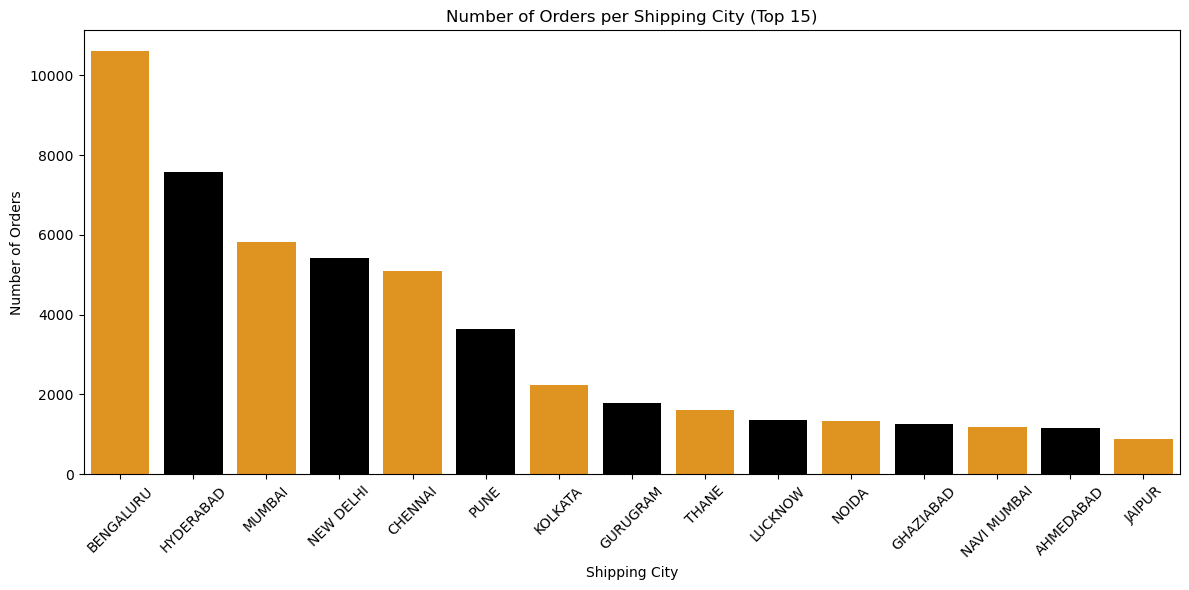

In [32]:
Top_15_Cities = df['ship-city'].value_counts().head(15).index

# Filter the DataFrame to include only the top 15 city
df_top_15 = df[df['ship-city'].isin(Top_15_Cities)]
plt.figure(figsize=(12, 6))
sns.countplot(x='ship-city', data=df_top_15, order=df_top_15['ship-city'].value_counts().index,palette=['#FF9900', 'black'])
plt.title('Number of Orders per Shipping City (Top 15)')
plt.xlabel('Shipping City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: The bar plot shows the number of orders per shipping city, focusing on the top 15 cities in descending order by order count.



# Conclusion





The business exhibits a strong customer presence in Maharashtra state, highlighting it as a key market. The majority of customers are retailers, indicating a focus on serving this segment. Orders are primarily fulfilled through Amazon, underscoring its role as a crucial partner in the supply chain.

There is notable demand for T-shirts, suggesting they are a popular product category among buyers. Among the various sizes offered, M-Size emerges as the preferred choice among customers. Additionally, expedited delivery services are highly favored, reflecting a preference for quick and efficient order fulfillment.

These insights provide valuable guidance for optimizing inventory management, marketing strategies, and operational efficiency to meet customer expectations and capitalize on market opportunities effectively.

